In [1]:
import os
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import lineid_plot
from ramandecompy import spectrafit
from ramandecompy import peakidentify
from ramandecompy import dataprep
from ramandecompy import datavis
from ramandecompy import dataimport
from ramandecompy import machine_learning
from scipy import interpolate

In [2]:
dataprep.new_hdf5('supervised_calibration_dataset')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/water.xlsx', 'water')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Hydrogen_Baseline_Calibration.xlsx', 'hydrogen')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Methane_Baseline_Calibration.xlsx', 'methane')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/CarbonMonoxide_Baseline_Calibration.xlsx', 'carbon monoxide')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/CO2_100wt%.csv', 'carbon dioxide')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/sapphire.xlsx', 'sapphire')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Propane_test.xlsx', 'Propane')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Ethane_test.xlsx', 'Ethane')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Acetaldehyde_test.xlsx', 'Acetaldehyde')

Data from ../ramandecompy/tests/test_files/water.xlsx fit with compound pseudo-Voigt model. Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/Hydrogen_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model. Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/Methane_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model. Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/CarbonMonoxide_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model. Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/CO2_100wt%.csv fit with compound pseudo-Voigt model. Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/sapphire.xlsx fit with compound pseudo-Voigt model. Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_fil

[[array([0.0007832 , 0.00081809, 0.00086799, ..., 0.19818304, 0.19240399,
         0.18681302]),
  array([0.00055582, 0.00058175, 0.00062133, ..., 0.12984356, 0.12610134,
         0.12248969]),
  array([0.00069675, 0.00072632, 0.00076819, ..., 0.15606064, 0.1515106 ,
         0.14710962]),
  array([0.00086639, 0.0008905 , 0.00092295, ..., 0.08878627, 0.08622151,
         0.08374348]),
  array([0.00052943, 0.00054457, 0.00056498, ..., 0.14090719, 0.13680425,
         0.13282289]),
  array([0.00086922, 0.00089962, 0.00094464, ..., 0.28698196, 0.2786606 ,
         0.27059492]),
  array([0.00054274, 0.00055067, 0.00056081, ..., 0.28839675, 0.27999538,
         0.27182459]),
  array([0.00084711, 0.00085585, 0.00086649, ..., 0.32010137, 0.31080911,
         0.30177047]),
  array([0.00072836, 0.00073758, 0.00074812, ..., 0.31358619, 0.3044534 ,
         0.29556867]),
  array([0.00056593, 0.00057409, 0.00058384, ..., 0.06127215, 0.05951344,
         0.0578051 ])],
 [array([0.00094246, 0.000966

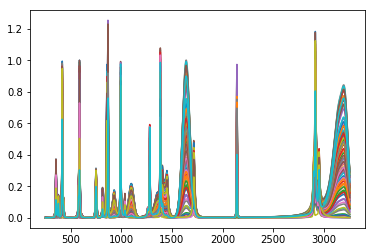

In [3]:
# first a function that will return a normalized interpolated spectra
target_compound = 'water'
# compound = 'water'
hdf5_filename = 'supervised_calibration_dataset.hdf5'
spectra_count = 10
hdf5 = h5py.File(hdf5_filename, 'r+')
# get list of compounds from hdf5 file
y_data_list = []
compound_list = list(hdf5.keys())
for target_compound in compound_list:
    x_data, y_data, labels = machine_learning.generate_spectra_dataset(hdf5_filename, target_compound, spectra_count)
    y_data_list.append(y_data)
len(x_data)
y_data_list

In [4]:
from sklearn.model_selection import train_test_split

# divide and extract test/train and validation data

X_train, X_test, y_train, y_test = train_test_split(y_data, labels, test_size=0.2)
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

8 8
2 2


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X_train, y_train)

# get predictions
Z = logreg.predict(X_test)

logreg.score(X_test, y_test)

1.0

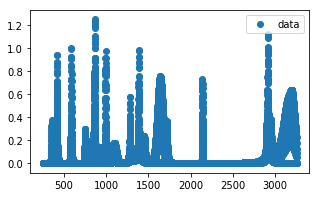

In [6]:



fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(x_data, y_data, label='data')
# ax.scatter(X_train, y_train, label='train')
# ax.scatter(X_test, y_test, label='teste')
# ax.scatter(X_test, regr.predict(X_test), label='predicted')

# fig, ax = plt.subplots(figsize=(5, 3))
# y = dat['fraction'].values
# x = dat['height'].values
# # Create the linear regression model
# LogRegr = linear_model.LogisticRegression() 
# # plotting the balance
# ax.scatter(dat['height'], dat['fraction'], label = 'balance default',color='r')

# # fit the linear model 
# LogRegr.fit(x.reshape(-1,1),y.reshape(-1,1))
# xres = np.array(x).reshape(-1,1)
# plt.plot(x,LogRegr.predict_proba(xres)[:,1],'o',label = 'fit')
# # Find the coefficients B0 and B1
# print('B0, B1: ',LogRegr.intercept_, LogRegr.coef_[0])
# ax.set_ylabel('Probability Default')
# ax.set_xlabel('Balance')
# ax.set_title('Probability Default vs. Balance')
plt.legend()

In [7]:
dataprep.new_hdf5('supervised_calibration_cal')

In [ ]:
hdf5_calfilename = 'supervised_calibration_cal.hdf5' #update to hdf5_calfilename
key = 'cal'
for num, label in enumerate(labels):
    machine_learning.combine_experiment(hdf5_calfilename, key, x_data, y_data, label, num)

cal/0/residuals
Data from fit with compound pseudo-Voigt model.
          Results saved to supervised_calibration_cal.hdf5.
cal/1/residuals
Data from fit with compound pseudo-Voigt model.
          Results saved to supervised_calibration_cal.hdf5.
cal/2/residuals
Data from fit with compound pseudo-Voigt model.
          Results saved to supervised_calibration_cal.hdf5.
cal/3/residuals
Data from fit with compound pseudo-Voigt model.
          Results saved to supervised_calibration_cal.hdf5.
cal/4/residuals
Data from fit with compound pseudo-Voigt model.
          Results saved to supervised_calibration_cal.hdf5.


In [ ]:
key_list = machine_learning.keyfinder(hdf5_calfilename)
key_list

In [ ]:
hdf5_calfilename = 'supervised_calibration_dataset.hdf5' #update to hdf5_calfilename
hdf5_expfilename = 'supervised_calibration_cal.hdf5'
frames = []
for i,key in enumerate(key_list):
    df =peakidentify.peak_assignment(hdf5_expfilename, key, hdf5_calfilename, 50, plot =False)
    frames.append(df)

In [ ]:
result = pd.concat(frames,axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True,sort=True)

In [ ]:
cal = pd.DataFrame()

In [ ]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
cal['fraction']= result[:][0]
cal['sigma']= result[:][1]
# dat['center']= result[:][2]
cal['amplitude']= result[:][3]
cal['fwhm']= result[:][4]
cal['height']= result[:][5]
cal['auc']= result[:][6]
cal['labelencoded']=le.fit_transform(result[:][7])
cal['labels']= result[:][7]
cal['center']= result[:][2]

In [ ]:
dataprep.view_hdf5('dataimport_ML_df-Copy1.hdf5')

In [ ]:
hdf5_calfilename = 'supervised_calibration_dataset.hdf5' 
hdf5_expfilename = 'dataimport_ML_df-Copy1.hdf5'
frames = []
for _, key in enumerate(key_list):
    df =peakidentify.peak_assignment(hdf5_expfilename, key, hdf5_calfilename, 50, plot =False)
    frames.append(df)

In [ ]:
result = pd.concat(frames,axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True,sort=True)

In [ ]:
dat = pd.DataFrame()

In [ ]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
dat['fraction']= result[:][0]
dat['sigma']= result[:][1]
# dat['center']= result[:][2]
dat['amplitude']= result[:][3]
dat['fwhm']= result[:][4]
dat['height']= result[:][5]
dat['auc']= result[:][6]
dat['labelencoded']=le.fit_transform(result[:][7])
dat['labels']= result[:][7]
dat['center']= result[:][2]